# Explore here

In [2]:
# Handle imports up-front
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the data from the URL
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Tuned Model Accuracy: 0.7402597402597403


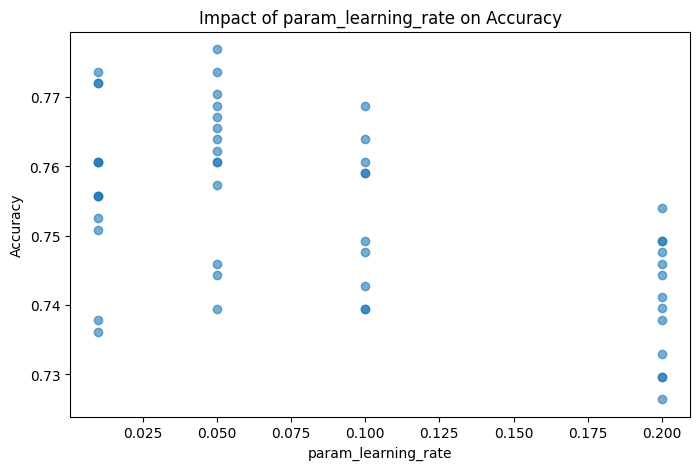

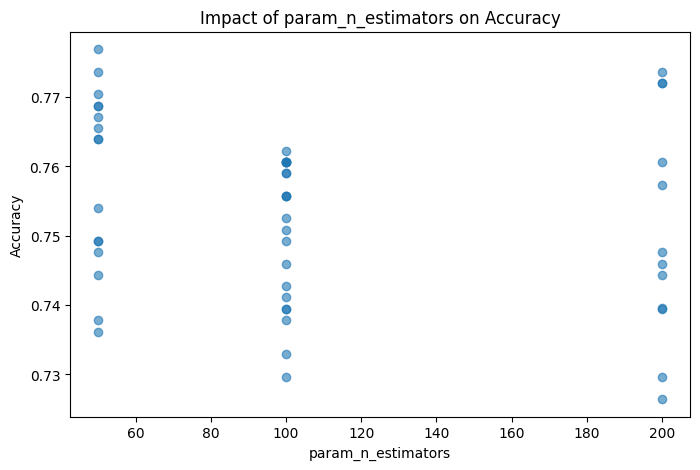

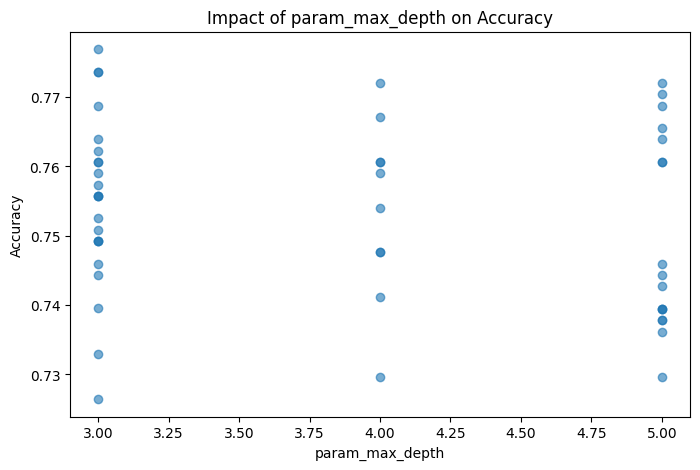

In [4]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Split data into features (X) and target (y)
X = data_df.drop(columns=['Outcome'])
y = data_df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=1
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_gbc = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the tuned model
y_pred = best_gbc.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred)
print("Tuned Model Accuracy:", tuned_accuracy)

# Analyze the impact of different parameters on accuracy
results = pd.DataFrame(random_search.cv_results_)
key_parameters = ['param_learning_rate', 'param_n_estimators', 'param_max_depth']

# Plot the impact of key parameters on accuracy
for param in key_parameters:
    plt.figure(figsize=(8, 5))
    plt.scatter(results[param], results['mean_test_score'], alpha=0.6)
    plt.title(f'Impact of {param} on Accuracy')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.show()


In [5]:
def cross_val(model, features: pd.DataFrame, labels: pd.Series) -> list[float]:
    '''Reusable helper function to run cross-validation on a model. Takes model,
    Pandas data frame of features and Pandas data series of labels. Returns 
    list of cross-validation fold accuracy scores as percents.'''

    # Define the cross-validation strategy
    cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

    # Run the cross-validation, collecting the scores
    scores=cross_val_score(
        model,
        features,
        labels,
        cv=cross_validation,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Print mean and standard deviation of the scores
    print(f'Cross-validation accuracy: {(scores.mean() * 100):.2f} +/- {(scores.std() * 100):.2f}%')

    # Return the scores
    return scores

In [6]:
model=RandomForestClassifier(random_state=315)

# Run the cross-validation
scores=cross_val(model, X_train, y_train)

Cross-validation accuracy: 75.89 +/- 4.17%


In [7]:
print("Missing values in each column:")
print(data_df.isnull().sum())
print("\nSummary statistics:")
print(data_df.describe())

# Replace extreme zero values with NaN for certain columns where zero is not valid
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_df[columns_to_clean] = data_df[columns_to_clean].replace(0, np.nan)

# Check again for missing values after replacing zeros
print("\nMissing values after replacing zeros:")
print(data_df.isnull().sum())

# Handle missing values: Impute with mean or median for each column
for column in columns_to_clean:
    data_df[column].fillna(data_df[column].median(), inplace=True)

# Confirm no missing values remain
print("\nMissing values after imputation:")
print(data_df.isnull().sum())

# Verify the cleaned data
print("\nCleaned data summary statistics:")
print(data_df.describe())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000

/tmp/ipykernel_2540/209297458.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df[column].fillna(data_df[column].median(), inplace=True)
/tmp/ipykernel_2540/209297458.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

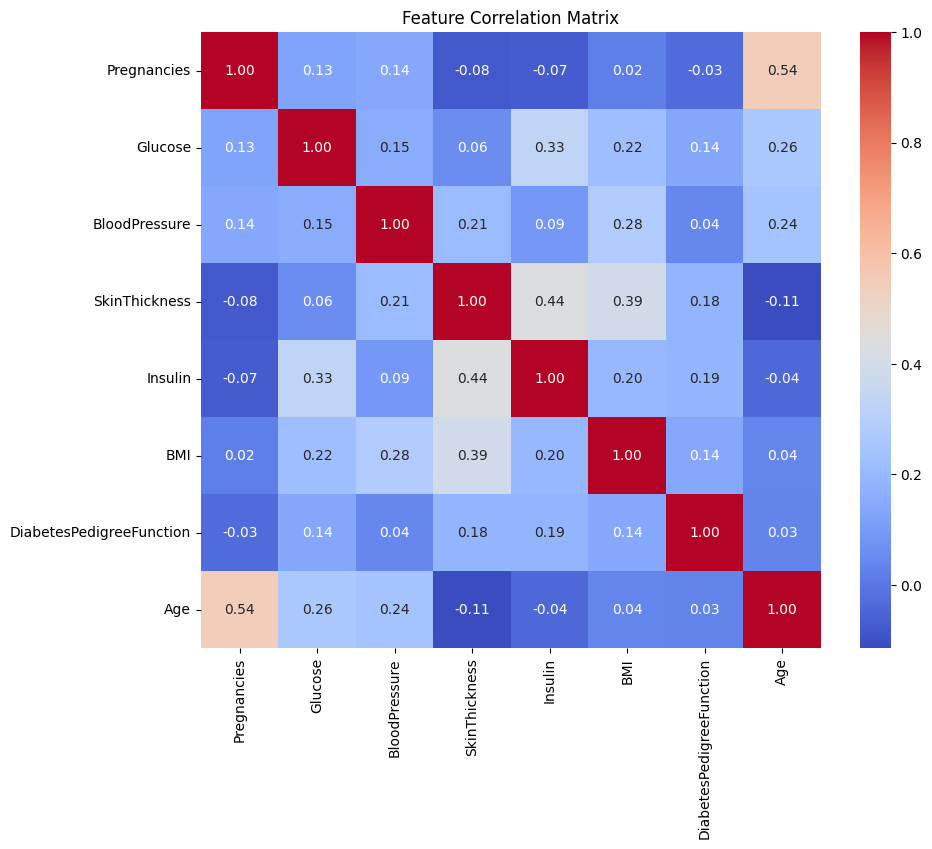

Highly correlated features to consider dropping: set()


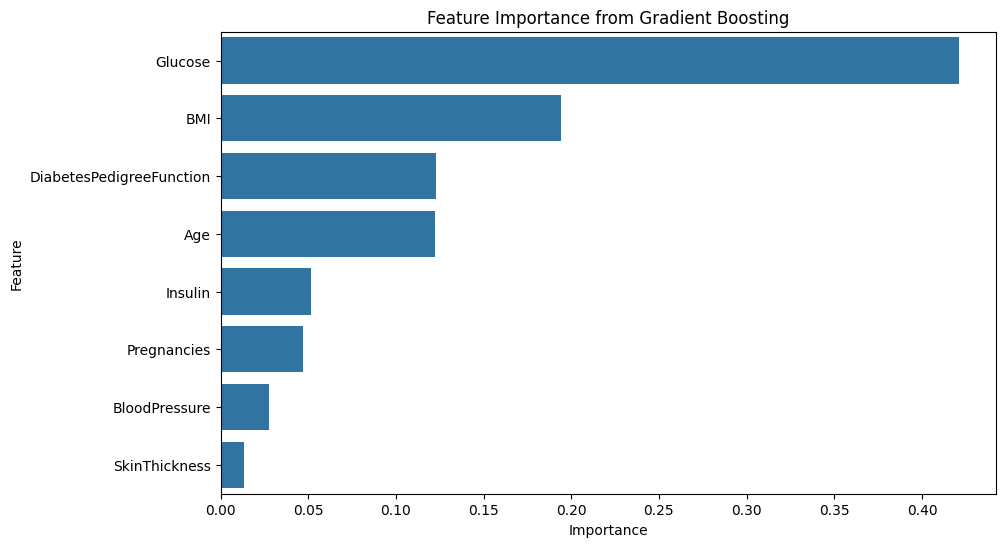

Selected Features using RFE: ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


# --- Correlation Analysis ---
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Drop highly correlated features (if correlation > 0.9)
threshold = 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])

print("Highly correlated features to consider dropping:", correlated_features)

# --- Feature Importance using Gradient Boosting ---
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance from Gradient Boosting")
plt.show()

# --- Recursive Feature Elimination (RFE) ---
rfe = RFE(estimator=gbc, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", list(selected_features))

# Reduce the dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [9]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Perform Recursive Feature Elimination (RFE)
gbc = GradientBoostingClassifier(random_state=42)
rfe = RFE(estimator=gbc, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Select the top features
selected_features = X.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Gradient Boosting model on selected features
gbc_selected = GradientBoostingClassifier(random_state=42)
gbc_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_selected = gbc_selected.predict(X_test_selected)

# Evaluate the model
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on test set with selected features:", accuracy_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_selected))

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gbc_selected, X_train_selected, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print("\nCross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

Accuracy on test set with selected features: 0.7467532467532467

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154


Cross-Validation Scores:
[0.78861789 0.7398374  0.77235772 0.75609756 0.7295082 ]
Mean CV Accuracy: 0.7572837531654004
Standard Deviation of CV Accuracy: 0.021383715106968904


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Define the hyperparameter distributions to sample from
distributions={
    'n_estimators': list(range(2, 100))
}

# Instantiate a random forest classifier model
model=RandomForestClassifier(random_state=315)

# Define the cross-validation strategy
cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

# Set-up the search
search=RandomizedSearchCV(
    model,
    distributions,
    scoring='accuracy',
    n_jobs=-1,
    cv=cross_validation,
    n_iter=100,
    random_state=315,
    return_train_score=True
)

# Run the grid search
results=search.fit(X_train_selected, y_train)

# Print the best parameter settings found at the end
print(f'Best hyperparameters: {results.best_params_}')

Best hyperparameters: {'n_estimators': 92}



--- Decision Tree Evaluation ---
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154


--- Random Forest Evaluation ---
Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


--- Gradient Boosting Evaluation ---
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61 

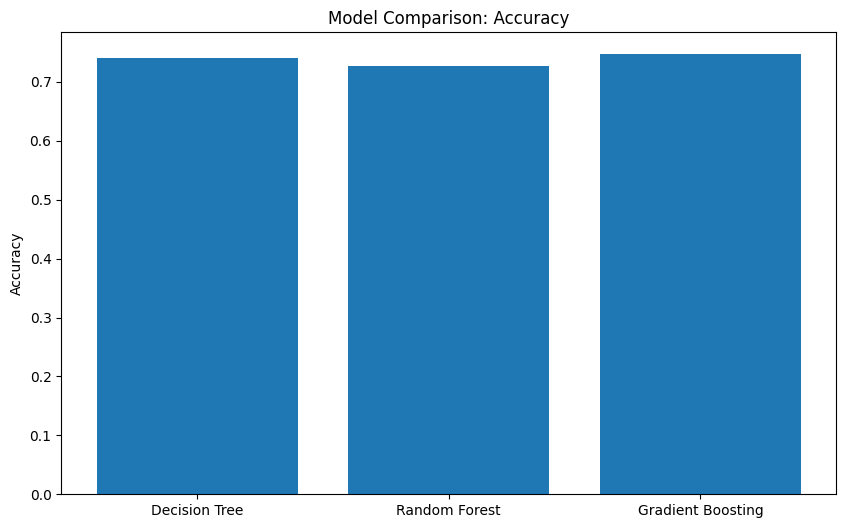

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gbc_model = GradientBoostingClassifier(random_state=42)

# Train each model on the selected features
dt_model.fit(X_train_selected, y_train)
rf_model.fit(X_train_selected, y_train)
gbc_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_selected)
y_pred_rf = rf_model.predict(X_test_selected)
y_pred_gbc = gbc_model.predict(X_test_selected)

# Evaluate each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)

print("\n--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

print("\n--- Random Forest Evaluation ---")
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

print("\n--- Gradient Boosting Evaluation ---")
print(f"Accuracy: {accuracy_gbc}")
print(classification_report(y_test, y_pred_gbc))

# Compare Results
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_gbc]
})

# Plot comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()

The gradient boosting yields the best results. 